# The Spark Foundation : Data Scinece and Business Analytics Internship

## Task 1 : Prediction Using Supervised Machine Learning
## Predict the percentage of an student based on the no. of study hours.

### Author-Vaishnavi Suresh Salunkhe


In [1]:
#loading required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READING THE DATASET
import pandas as pd
data=pd.read_csv("C:\\Users\\avdhu\\OneDrive\\Documents\\student_scores - student_scores.csv")
data.head()  #used to first five rows of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Step 2:Visualization of Data

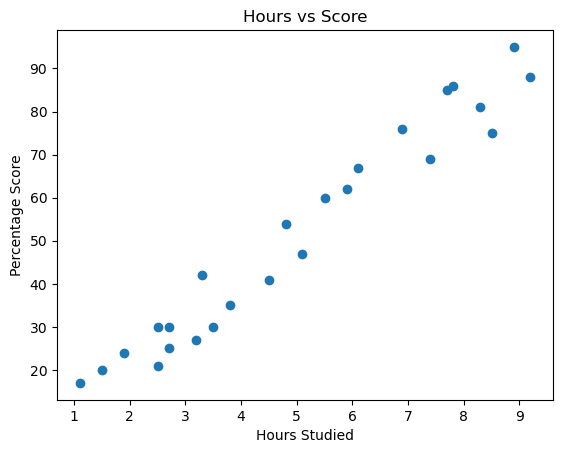

In [7]:
plt.scatter(x=data.Hours, y=data.Scores)  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### The above Scatter plot is to enter distribution scores and plot them according to the requirement,here we are going to enter the title, x_label, and y_label, and show it according to the desired result.


## Step 2 : Prepare the data set for machine learning

In [9]:
#data cleaning
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [11]:
data2=data.fillna(data.mean())
data2.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
#Split the dataset fpr trainig
x=data2.drop("Scores", axis="columns")
y=data2.drop("Hours", axis="columns")
print("shape of x", x. shape)
print("shape of y", y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=2)

In [20]:
print("shape of x train",x_train.shape)
print("shape of y train",y_train.shape)
print("shape of x_ test",x_test.shape)
print("shape of y_ test",y_test.shape)

shape of x train (20, 1)
shape of y train (20, 1)
shape of x_ test (5, 1)
shape of y_ test (5, 1)


## Step 4 : Select the model and train it 

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.coef_

array([[9.94061514]])

In [25]:
lr.intercept_

array([1.50791048])

In [26]:
m=3.93
c=50.44
y=m*12+c
y

97.6

In [27]:
lr.predict([[4]])[0][0].round(2)

C:\Users\avdhu\data science\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.27

In [28]:
y_pred=lr.predict(x_test)
y_pred


array([[12.44258714],
       [26.35944834],
       [20.39507925],
       [92.9615698 ],
       [70.09815497]])

In [29]:
lr.score(x_test,y_test)

0.9735538080811826

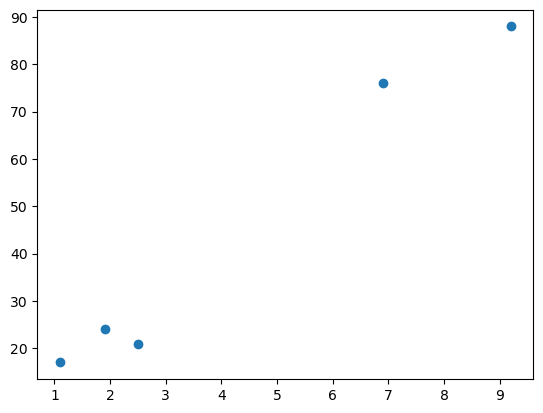

In [30]:
plt.scatter(x_test,y_test)

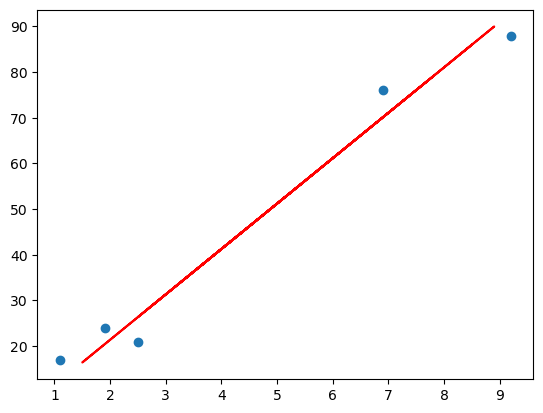

In [32]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color='red')

In [34]:
import joblib
joblib.dump(lr,"students_marks_predictor.pkl")

['students_marks_predictor.pkl']

In [35]:
model=joblib.load("students_marks_predictor.pkl")
model.predict([[9.25]])

C:\Users\avdhu\data science\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[93.45860056]])

## If a student studies for 9.25 hours per day he might score:[93.45860056]
    